In [ ]:
!pip install kaggle

In [2]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d alessiocorrado99/animals10

In [4]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/animals10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [5]:
# importing what we need
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pltm
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [6]:
# creating 10 lists contain our files
cane_images = os.listdir('/content/raw-img/cane')
cavallo_images = os.listdir('/content/raw-img/cavallo')
elefante_images = os.listdir('/content/raw-img/elefante')
farfalla_images = os.listdir('/content/raw-img/farfalla')
gallina_images = os.listdir('/content/raw-img/gallina')
#gatto_images = os.listdir('/content/raw-img/gatto')
#mucca_images = os.listdir('/content/raw-img/mucca')
#pecora_images = os.listdir('/content/raw-img/pecora')
#rango_images = os.listdir('/content/raw-img/ragno')
#scoittalo_images = os.listdir('/content/raw-img/scoiattolo')

In [7]:
len(cane_images),len(cavallo_images),len(elefante_images),len(farfalla_images),len(gallina_images)#,len(gatto_images),len(mucca_images),len(pecora_images),len(rango_images),len(scoittalo_images)

(4863, 2623, 1446, 2112, 3098)

In [8]:
# create the labels
cane_images_labels = [0]*4863
cavallo_images_labels = [1]*2623
elefante_images_labels = [2]*1446
farfalla_images_labels = [3]*2112
gallina_images_labels = [4]*3098
#gatto_images_labels = [5]*1668
#mucca_images_labels = [6]*1866
#pecora_images_labels = [7]*1820
#rango_images_labels = [8]*4821
#scoittalo_images_labels =[9]*1862

In [9]:
# here i add them to create a list of ones and zeros
labels = cane_images_labels +cavallo_images_labels +elefante_images_labels +farfalla_images_labels +gallina_images_labels #+gatto_images_labels +mucca_images_labels +pecora_images_labels +rango_images_labels+scoittalo_images_labels

In [10]:
cane_images[0],cavallo_images[0]

('OIP-iMVAfawK7_XygolLc2eG9wHaFj.jpeg', 'OIP--l2ukYr0WsiWs3pm7fCl0AHaGp.jpeg')

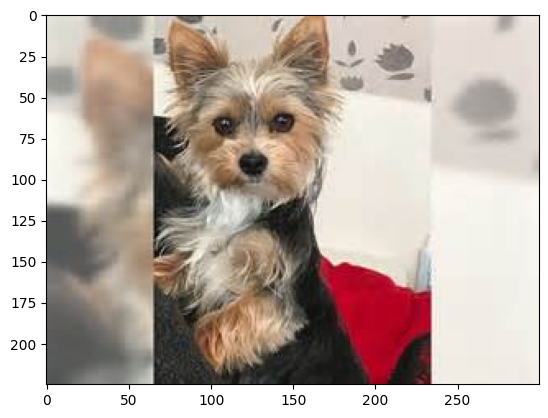

In [11]:
# displaying cane_image
img = pltm.imread('/content/raw-img/cane/OIF-e2bexWrojgtQnAPPcUfOWQ.jpeg')
imgplot = plt.imshow(img)
plt.show()

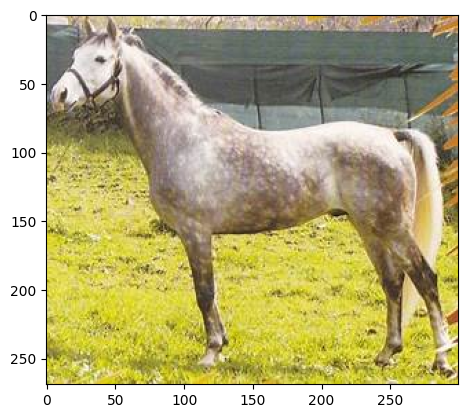

In [12]:
# displaying cane_image
img = pltm.imread('/content/raw-img/cavallo/OIP--l2ukYr0WsiWs3pm7fCl0AHaGp.jpeg')
imgplot = plt.imshow(img)
plt.show()

In [13]:
# convert images to tensors
import tensorflow as tf
data=[]
images=[cane_images ,cavallo_images ,elefante_images,farfalla_images,gallina_images ]#,gatto_images ,mucca_images ,pecora_images ,rango_images,scoittalo_images]
paths = ['/content/raw-img/cane/','/content/raw-img/cavallo/','/content/raw-img/elefante/','/content/raw-img/farfalla/','/content/raw-img/gallina/']#,'/content/raw-img/gatto/','/content/raw-img/mucca/','/content/raw-img/pecora/','/content/raw-img/ragno/','/content/raw-img/scoiattolo/']
for i in range(len(paths)):
  for img_file in images[i]:
    image = Image.open(paths[i] + img_file) # from PIL
    image = image.resize((128,128))
    image = image.convert('RGB')
    image = np.array(image)
    image = tf.convert_to_tensor(image)
    data.append(image)

In [14]:
type(data),len(data),data[0]

(list,
 14142,
 <tf.Tensor: shape=(128, 128, 3), dtype=uint8, numpy=
 array([[[ 47,  50,  33],
         [ 47,  50,  33],
         [ 48,  51,  34],
         ...,
         [ 66,  80,  58],
         [ 65,  79,  56],
         [ 66,  80,  57]],
 
        [[ 47,  50,  33],
         [ 47,  50,  33],
         [ 46,  49,  32],
         ...,
         [ 63,  75,  55],
         [ 65,  77,  56],
         [ 71,  83,  61]],
 
        [[ 52,  55,  38],
         [ 51,  54,  37],
         [ 49,  52,  35],
         ...,
         [ 53,  65,  45],
         [ 59,  71,  50],
         [ 64,  76,  55]],
 
        ...,
 
        [[173, 178, 182],
         [172, 177, 181],
         [171, 176, 180],
         ...,
         [134, 142, 131],
         [133, 141, 130],
         [136, 144, 133]],
 
        [[175, 180, 184],
         [172, 177, 181],
         [168, 173, 177],
         ...,
         [135, 143, 132],
         [134, 142, 131],
         [138, 146, 135]],
 
        [[175, 179, 178],
         [174, 179, 178],

In [15]:
# converting image list and label list to tensor

X = tf.convert_to_tensor(data)
Y = tf.convert_to_tensor(labels)

In [16]:
X.shape,Y.shape

(TensorShape([14142, 128, 128, 3]), TensorShape([14142]))

In [17]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)   # random_state is a parameter that gives the order
train_size = int(0.8*len(X))
tf.random.set_seed(40)
X = tf.random.shuffle(X,seed=40)
Y = tf.random.shuffle(Y,seed=40)
X_train,X_test = tf.split(X,[train_size,len(X)-train_size])
Y_train,Y_test = tf.split(Y,[train_size,len(X)-train_size])

In [18]:
X.shape, X_train.shape, X_test.shape

(TensorShape([14142, 128, 128, 3]),
 TensorShape([11313, 128, 128, 3]),
 TensorShape([2829, 128, 128, 3]))

In [19]:
#scaling the data
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [20]:
from tensorflow import keras
num_of_classes = 10

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='softmax'))

In [21]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [22]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=30)

Epoch 1/30
319/319 [==============================] - 20s 21ms/step - loss: 1.6143 - acc: 0.3557 - val_loss: 1.3528 - val_acc: 0.4143
Epoch 2/30
319/319 [==============================] - 5s 17ms/step - loss: 1.3368 - acc: 0.4470 - val_loss: 1.3246 - val_acc: 0.4037
Epoch 3/30
319/319 [==============================] - 6s 18ms/step - loss: 1.1579 - acc: 0.5340 - val_loss: 0.9413 - val_acc: 0.6254
Epoch 4/30
319/319 [==============================] - 6s 17ms/step - loss: 0.9783 - acc: 0.6301 - val_loss: 0.7682 - val_acc: 0.7350
Epoch 5/30
319/319 [==============================] - 6s 17ms/step - loss: 0.8606 - acc: 0.6932 - val_loss: 0.7582 - val_acc: 0.7270
Epoch 6/30
319/319 [==============================] - 6s 18ms/step - loss: 0.7292 - acc: 0.7474 - val_loss: 0.6766 - val_acc: 0.7633
Epoch 7/30
319/319 [==============================] - 5s 17ms/step - loss: 0.6454 - acc: 0.7785 - val_loss: 0.6042 - val_acc: 0.7792
Epoch 8/30
319/319 [==============================] - 6s 18ms/step -

In [23]:
# evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

89/89 [==============================] - 1s 13ms/step - loss: 1.1494 - acc: 0.8091
Test Accuracy = 0.8091198205947876


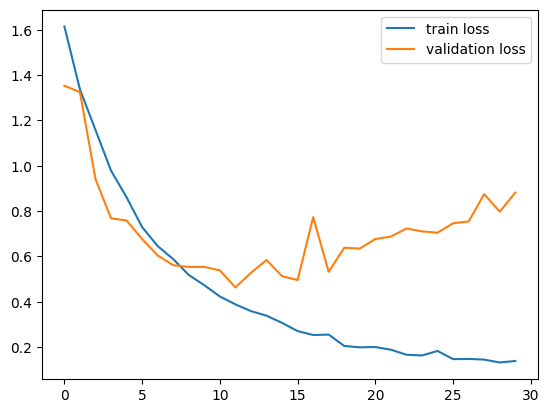

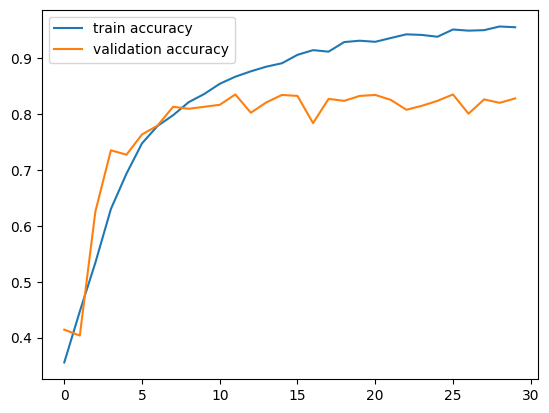

In [24]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/quanto_pesa_un_cavallo_3353_600.jpg


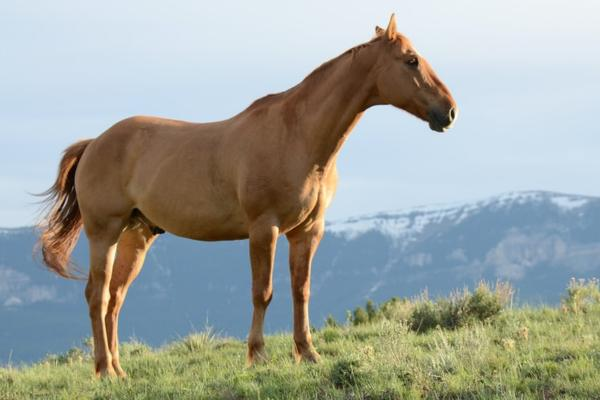

1/1 [==============================] - 0s 38ms/step
[[1.2753680e-04 9.9987245e-01 3.6622283e-10 2.9577921e-10 6.1120029e-09
  2.4081512e-29 4.2603003e-29 1.1246769e-28 3.4980696e-29 5.0601143e-31]]
1
the animal in the image is a cavallo


In [26]:
# prediction
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:
  print('the animal in the image is a cane')
elif input_pred_label==1:
  print('the animal in the image is a cavallo')
elif input_pred_label==2:
  print('the animal in the image is a elefante')
elif input_pred_label==3:
  print('the animal in the image is a farfalla')
else:
  print('the animal in the image is a gallina')
#elif:
#  print('the animal in the image is a gatto')
#elif:
#  print('the animal in the image is a mucca')
#elif:
#  print('the animal in the image is a pecora')
#elif:
#  print('the animal in the image is a rango')
#else:
#  print('the animal in the image is a scoiattolo')"""